In [1]:
# 🚢 Titanic Survival Prediction - Creative Visual Storytelling

In [ ]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [10]:
import warnings

In [11]:
warnings.filterwarnings('ignore')

In [12]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [13]:
# Loading the Dataset

In [14]:
df = pd.read_csv("C:/Users/Sangee/Desktop/Titanic-Dataset.csv")

In [15]:
print("✅ Dataset Loaded")

✅ Dataset Loaded


In [16]:
# 🧹 Cleaning & Preprocessing

In [17]:
df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [18]:
# 💡 Feature Engineering

In [19]:
df['FamilySize'] = df['SibSp'] + df['Parch']
df['IsAlone'] = np.where(df['FamilySize'] == 0, 1, 0)
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 40, 60, 100],
                        labels=['Child', 'Teen', 'Adult', 'MiddleAge', 'Senior'])

In [20]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked', 'AgeGroup'], drop_first=True)

In [21]:
# 🎨 Data Visualization & Insights

In [22]:
# 1. Pie Chart of Survival

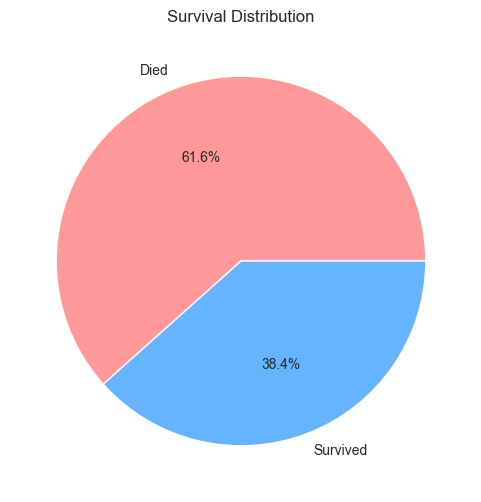

In [23]:
plt.figure(figsize=(6,6))
df['Survived'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Died','Survived'], colors=['#ff9999','#66b3ff'])
plt.title("Survival Distribution")
plt.ylabel('')
plt.show()

In [24]:
# 2. Bar Plot - Survival by Gender

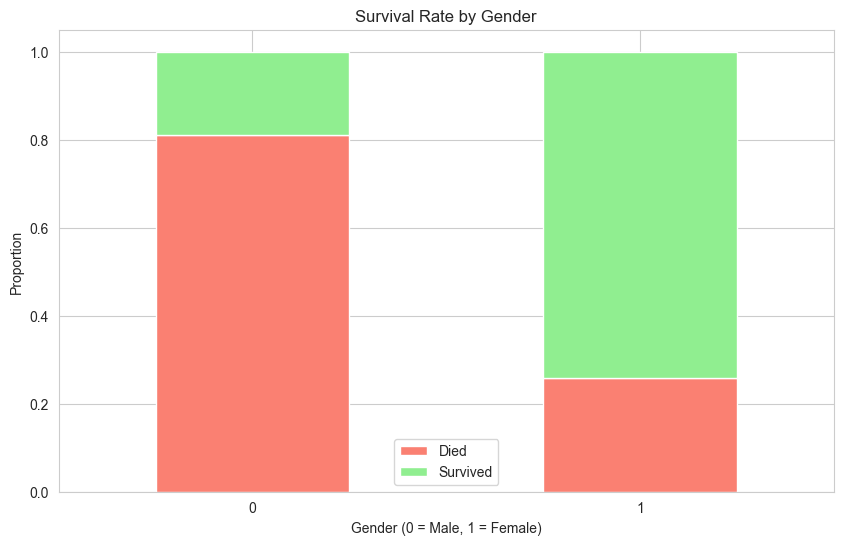

In [25]:
gender_survival = df.groupby('Sex')['Survived'].value_counts(normalize=True).unstack()
gender_survival.plot(kind='bar', stacked=True, color=['salmon', 'lightgreen'])
plt.title("Survival Rate by Gender")
plt.xlabel("Gender (0 = Male, 1 = Female)")
plt.ylabel("Proportion")
plt.legend(["Died", "Survived"])
plt.xticks(rotation=0)
plt.show()

In [26]:
# 3. Bar Plot - Survival by AgeGroup

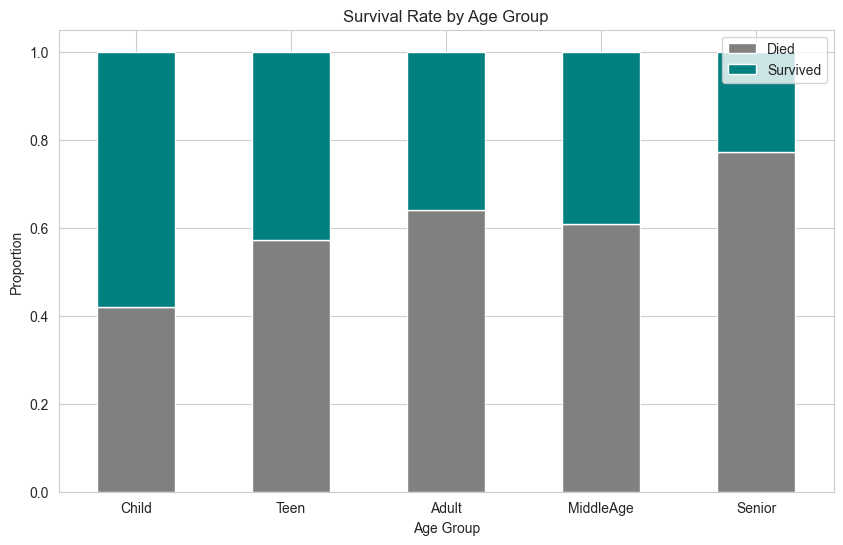

In [27]:
df['AgeGroup_Label'] = pd.cut(df['Age'], bins=[0, 12, 18, 40, 60, 100],
                              labels=['Child', 'Teen', 'Adult', 'MiddleAge', 'Senior'])

agegroup_survival = df.groupby('AgeGroup_Label')['Survived'].value_counts(normalize=True).unstack()
agegroup_survival.plot(kind='bar', stacked=True, color=['gray', 'teal'])
plt.title("Survival Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Proportion")
plt.legend(["Died", "Survived"])
plt.xticks(rotation=0)
plt.show()

In [28]:
# 4. Fare vs Survival

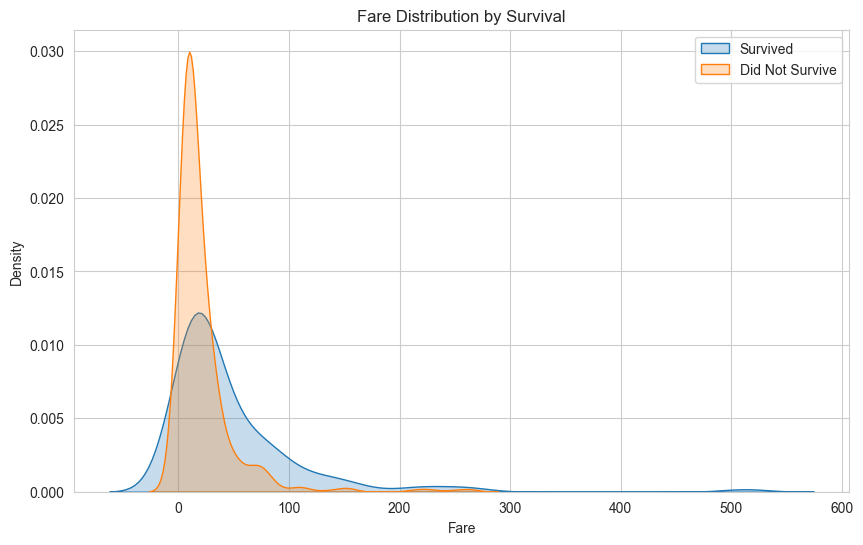

In [29]:
sns.kdeplot(df[df['Survived']==1]['Fare'], label="Survived", shade=True)
sns.kdeplot(df[df['Survived']==0]['Fare'], label="Did Not Survive", shade=True)
plt.title("Fare Distribution by Survival")
plt.xlabel("Fare")
plt.legend()
plt.show()

In [30]:
# 🎯 Model Training

In [32]:
X = df.drop(['Survived', 'AgeGroup_Label'], axis=1) 
y = df['Survived']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
# 🌲 Model training using Random Forest

In [36]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [37]:
print("🔍 Accuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

🔍 Accuracy: 82.12 %

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [38]:
# Confusion Matrix

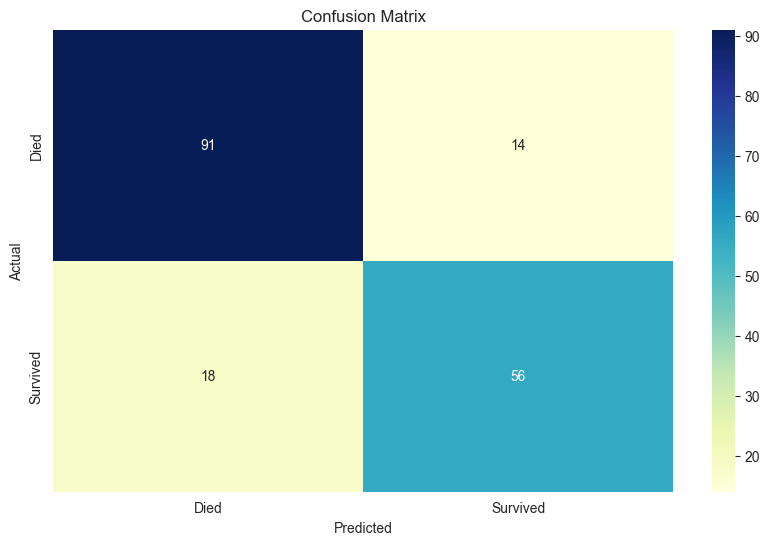

In [39]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='d', xticklabels=['Died','Survived'], yticklabels=['Died','Survived'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [40]:
# 🎯 Feature Importance

In [41]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
top_features = feature_importance.sort_values(ascending=False)

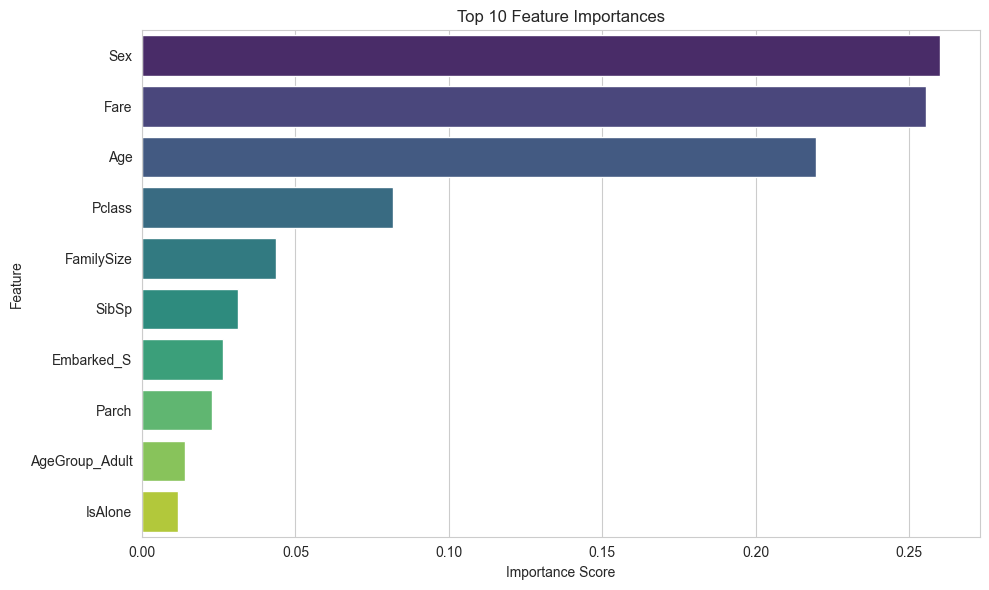

In [42]:
sns.barplot(x=top_features[:10], y=top_features.index[:10], palette='viridis')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()